### CSI-674<br>Assignment 1<br>Jericho McLeod

In [2]:
import matplotlib.pyplot as plt

#### Problem 1a:
For a polygraph test, where positive test results indicate a security concern:<br>
Sensitivity of a test: 80% (80% of positive cases will get a positive result from the test)<br>
Specificity of a test: 85% (85% of negative cases will get a negative result from the test)<br>
<br>
Assume 1 in 1000 cases are true. What is the posterior probability that a positive test result indicates a true positive result?

Prior probability of an event: <br>
$P(s_C) = 0.001$ (State = Concerned)

Prior probability of no event:<br>
$P(s_U) = 0.999$ (State = Unconcerned)

Probability of true positive:<br>
$P(t_P | s_C) = 0.80$ 

Probability of a true negative:<br>
$P(t_N | s_U)  = 0.85$

Test:<br>
$$ P(s_C | t_C)  = \frac{P(t_P|s_C)*P(s_C)}{P(t_P|s_C)*P(s_C) + P(t_P|s_U)*P(s_U)}$$

In [3]:
sC = 0.001
sU = 0.999
tP_sC = 0.8
tN_sU = 0.85
P = (tP_sC * sC) / ((tP_sC * sC) + ((1-tP_sC) * sU))
print(P)

0.003988035892323032


The posterior probability that a security violation has occurred is 0.399%, considering the evidence (test) and the prior probability of 0.1%. This means that from a bayesian perspective with limited considerations, polygraphs do not appear to be an valuable or dependable tool for discovering security violations. 

#### Problem 1b:
Prior probability of an event: <br>
$P(s_C) = 0.25$

Prior probability of no event:<br>
$P(s_U) = 0.75$

Probability of true positive:<br>
$P(t_P | s_C) = 0.80$

Probability of a true negative:<br>
$P(t_N | s_U)  = 0.85$

Test:<br>
$$ P(s_C | t_C)  = \frac{P(t_P|s_C)*P(s_C)}{P(t_P|s_C)*P(s_C) + P(t_P|s_U)*P(s_U)}$$

In [4]:
sC = 0.25
sU = 0.75
tP_sC = 0.8
tN_sU = 0.85
P = (tP_sC * sC) / ((tP_sC * sC) + ((1-tP_sC) * sU))
print(P)

0.5714285714285715


The posterior probability that the individual committed the theft in this case is 57.1%; significantly higher than the prior probability. Mathematically, this is due to the curve introduced by bayesian functions; as the entropy of events is maximized, bayesian tests provide better posteriors. To explain in a more application oriented manner, bayesian probabilities work best when the uncertainty prior to the test is high. The security violation was a relatively rare event, whereas the theft probability was relatively high.

#### Problem 2:
Prior probability of an event (Security Concern): <br>
$P(s_C) = Variable$

Prior probability of no event:<br>
$P(s_U) = (1-P(s_C)), Variable$
<br><br>
Probability of true positive (Sensitivity):<br>
$P(t_P | s_C) = 0.80$

Probability of a false positive:<br>
$P(t_P | s_U) = 0.20$

Probability of a true negative (Specificity):<br>
$P(t_N | s_U)  = 0.85$

Probability of a false negative:<br>
$P(t_N | s_C)  = 0.15$
<br><br>
Loss if Action = False (Do not sanction) given Concern = False<br>
$L(a_F|s_U) = 0$

Loss if Action = True (Sanction) given Concern = True<br>
$L(a_T|s_C) = 1$

Loss if Action = True (Sanction) given Concern = False<br>
$L(a_T|s_U) = 10$

Loss if Action = False (Do not sanction) given Concern = True<br>
$L(a_F|s_C) = 100$

Thus, the equations to solve for the follow-test calculations are:

$P(s_C|t_N) = \frac{P(t_N|s_C)P(s_C)}{P(t_N|s_C)P(s_C)+P(t_N|s_U)P(s_U)}$ for  a negative result and $P(s_C|t_P) = \frac{P(t_P|s_C)P(s_C)}{P(t_P|s_C)P(s_C)+P(t_P|s_U)P(s_U)}$ for a positive result (indicating a security concern).<br>

Then, the Expected utilities  can be calculated as:<br><br>
$EU(a_N|t_N) = P(s_C|t_N) * L(a_F|s_C) + (1-P(s_C|t_N))* L(a_F|s_U)$
$EU(a_T|t_P) = P(s_C|t_P) * L(a_T|s_C) + (1-P(s_C|t_P))* L(a_T|s_U)$




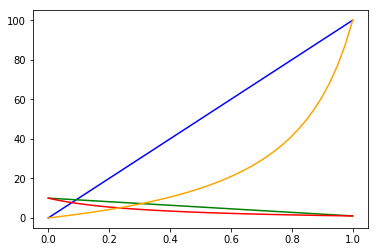

In [5]:
def expected_utility(p):
    sctn = (0.15*p)/(0.15*p  + 0.85*(1-p))
    sctp = (.8*p)/(.8*p + .2 * (1-p))
    antn = sctn * 100 + (1-sctn)*0
    attp = sctp * 1 + (1-sctp)*10
    return(antn,attp)

priors = []
an_loss = []
at_loss = []
af_tp_loss = []
af_tn_loss = []
for i in range(41):
    p = i*2.5/100
    priors.append(p)
    at_loss.append((10*(1-p))+(1*p)) #Losses for always sanction
    an_loss.append(100*p+(0*(1-p))) #Losses for never sanction
    antn,attp = expected_utility(p)
    af_tp_loss.append(attp)
    af_tn_loss.append(antn)

plt.plot(priors,an_loss,color='blue')
plt.plot(priors,at_loss,color='green')
plt.plot(priors,af_tp_loss,color='red')
plt.plot(priors,af_tn_loss,color='orange')
plt.show()

As we can see, below aboout 7.5% prior probability for a security concern, not administering the test and issuing no sanctions has the lowest utility cost, or highest utility. However, the cost of this course of action rises linearly to the maximum possible cost. 

Similarly, the cost of just always issuing sanctions is linear from 10 to 0 across the distribution of priors. This causes the cost of always issuing sanctions regardless of test results to the better choice once the prior for security concerns reaches approximately 30%. 

Therefore, the following template could be used to decide courses of action:<br>
Prior Prob < 7.5%: no sanctions<br>
Prior Prob >= 7.5% and <= 30%: follow test<br>
Prior Prob > 30%: always issue sanctions<br>

Given the limitation of the granularity of my prior distribution, there may be a margin of error < 2.5% above or below my reported figures. 

Comparing this to problem 1, it indicates that the expected value obtained by administering sanctions based on the results of a routine polygraph is lower than ignoring the test and administering no sanctions, while part 1b is in the range where following the results of the test are an appropriate course of action. 

#### Problem  3:

Sensitivity: $\theta$ from 0.025 to 0.975

12 of 15 tests are positive. 

Prepare a bar plot of posterior distribution of theta.

[0.025, 0.075, 0.125, 0.175, 0.22499999999999998, 0.27499999999999997, 0.325, 0.375, 0.425, 0.475, 0.5249999999999999, 0.575, 0.625, 0.6749999999999999, 0.725, 0.7749999999999999, 0.825, 0.875, 0.9249999999999999, 0.975]


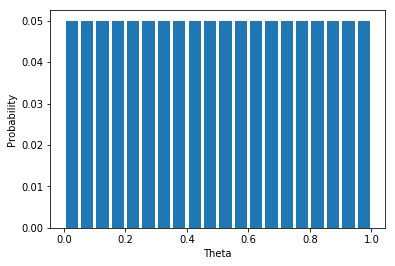

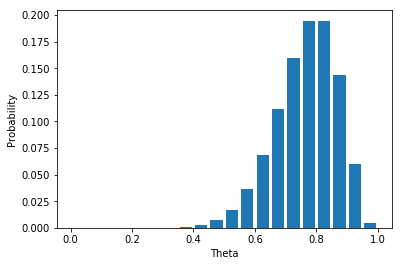

In [9]:
theta = []
prior_dist = []
for i in range(0,20):
    theta.append(((.95/19)*i)+.025)
    prior_dist.append(0.05)
print(theta)
plt.bar(theta,prior_dist,width=0.04)
plt.ylabel('Probability')
plt.xlabel('Theta')
plt.show()

num_obs = 15
num_d = 12
post_dist = []
post_dist_sum = 0

for i in range(len(prior_dist)):
    temp_val = (prior_dist[i]*theta[i]**(num_d)*(1-theta[i])**(num_obs-num_d))
    post_dist.append(temp_val)
    post_dist_sum += temp_val

for i in range(len(post_dist)):
    post_dist[i] = post_dist[i]/post_dist_sum
 
    
plt.bar(theta,post_dist,width=0.04)
plt.ylabel('Probability')
plt.xlabel('Theta')
plt.show()

The test returned positive results at a rate of 0.8; this is a poisson distribution of $\theta$, which was the probability of the polygraph showing a concern. 